In [1]:
# check if packages can be loaded, i.e. they are already installed
library(FNN) # KNN regression
library(ISLR2) # 3D visualisation
library(boot) # Bootstrap functions

2 Bias-Variance Trade Of

2.1 A simulation study

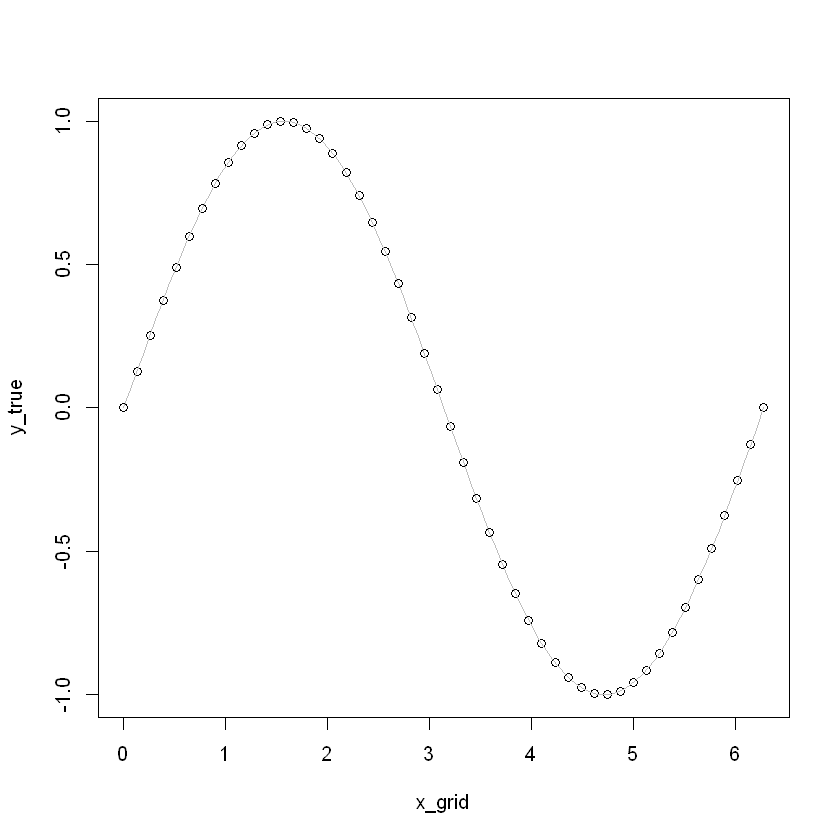

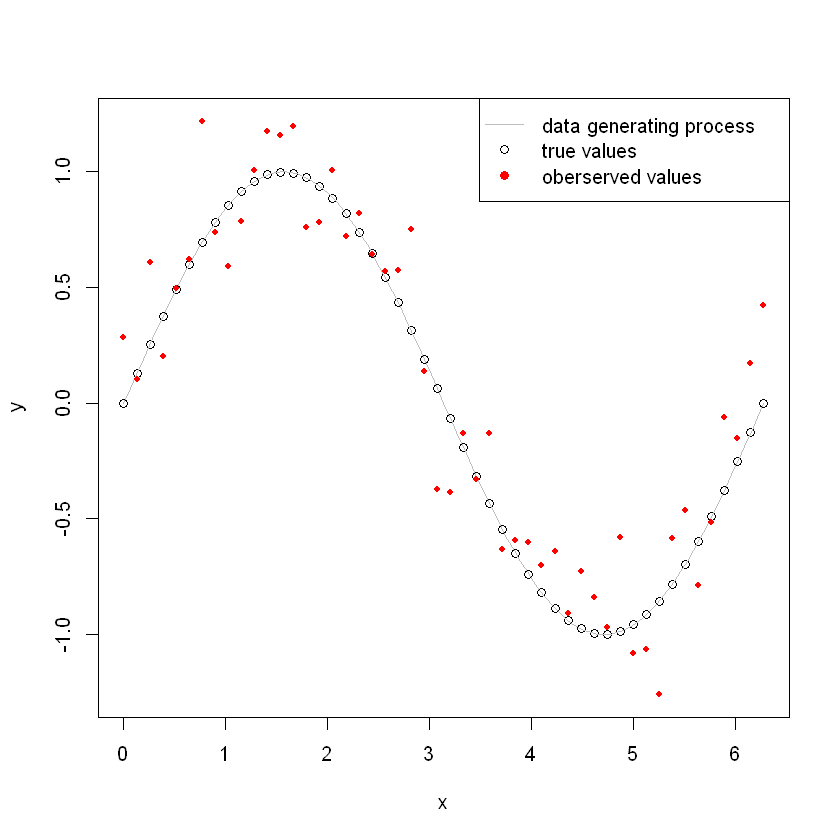

[1] 0.4936515

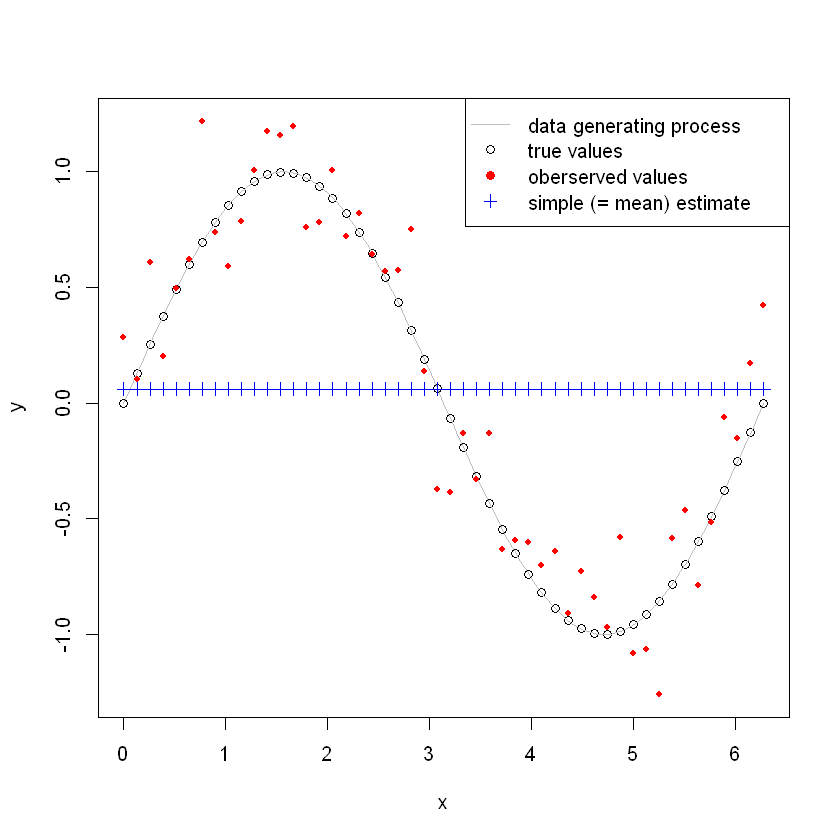

[1] 0.4900058

[1] 0.0008292117

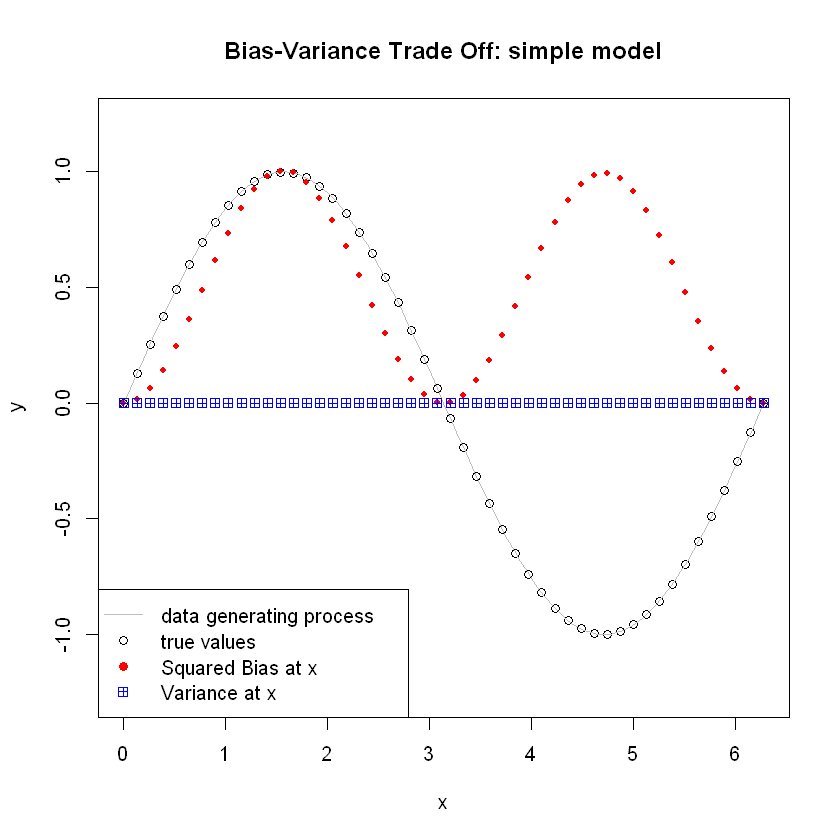

[1] 0.04957882

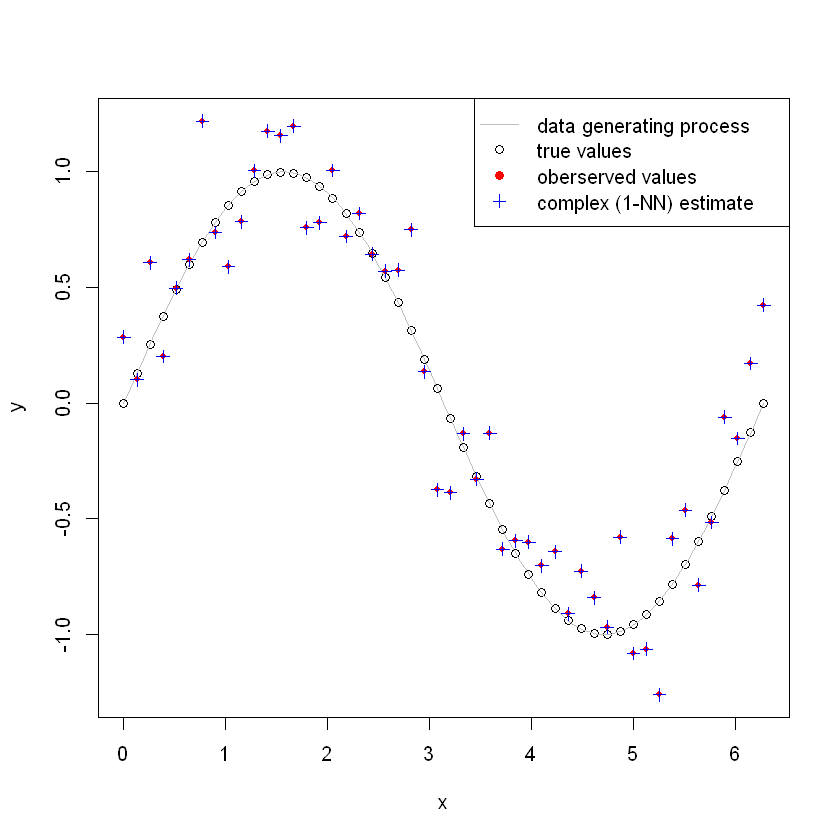

[1] 0.0002967595

[1] 0.04122872

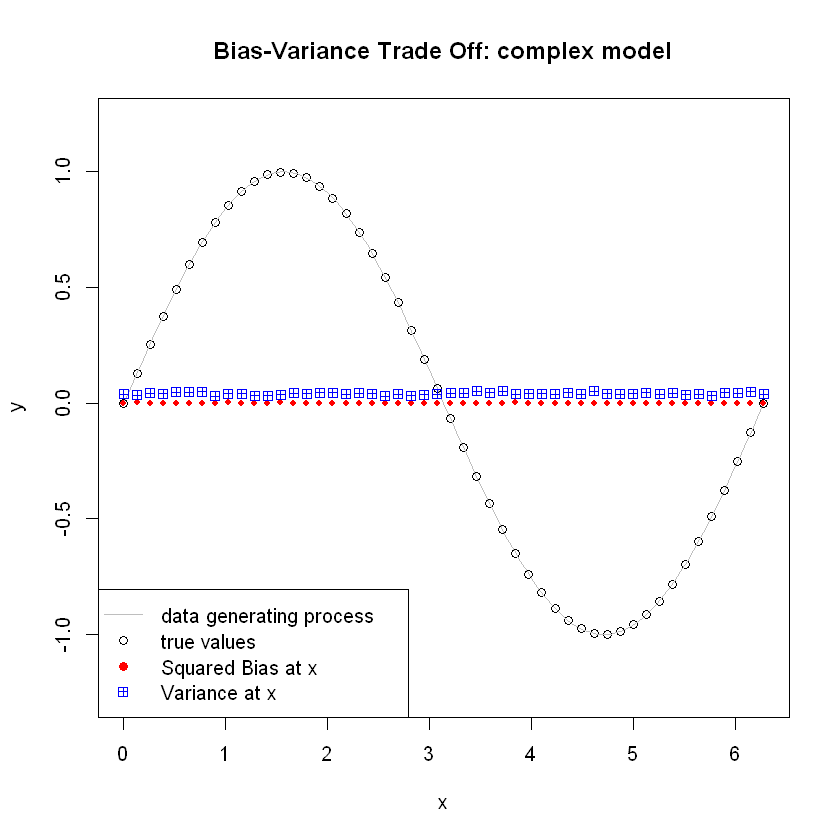

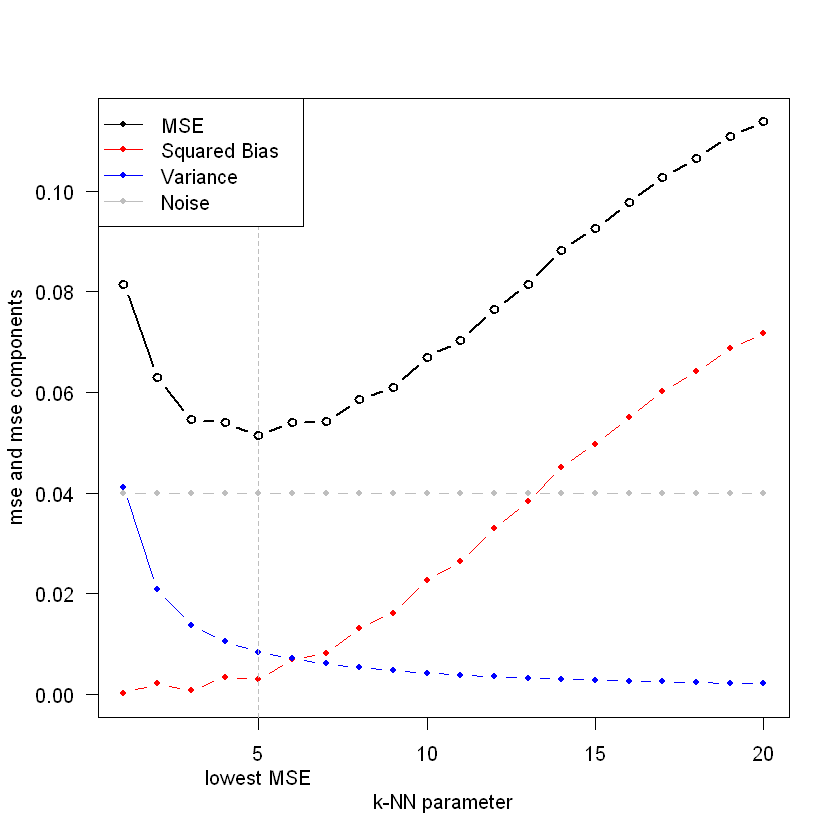

In [2]:
#==============================================================================#
# Bias-Variance Trade-Off: introductery example                                #
#==============================================================================#
rm(list = ls(all.names = TRUE))

# 00: packages -----------------------------------------------------------------
library(FNN)

# 01: data creation ------------------------------------------------------------

# true values ----
# with n = 50 equally spaced x values
n_x <- 50
x_grid <- seq(0, 2*pi,length = n_x)
y_true <- sin(x_grid)

# visualisation: data and function
plot(x_grid, y_true, type = "p", col = "black")
curve(sin, from = 0, to = 2*pi, add = TRUE, col = "grey")

# adding noise ----
# one simulation of an observed y  (true function plus noise)
sd_noise <- 0.2
set.seed(20241015)
y_train_1 <- y_true + rnorm(n_x, 0, sd_noise)

# visualisation: data and function
plot(x_grid, y_true, type = "p", col = "black", 
     ylim = range(c(y_true, y_train_1)),
     ylab = "y", xlab = "x")
curve(sin, from = 0, to = 2*pi, add = TRUE, col = "grey")
points(x_grid, y_train_1, col = "red", pch = 20)
legend("topright", legend = c("data generating process", 
                             "true values", 
                             "oberserved values"),
       col = c("grey", "black", "red"),
       lty = c(1, NA, NA), pch = c(NA, 1, 19))

# 02: Simple estimate - mean value ---------------------------------------------

# Simple estimate: average of y_train_1 for all x 
y_est_simple <- rep(mean(y_train_1), n_x) 

# visualisation
plot(x_grid, y_true, type = "p", col = "black", 
     ylim = range(c(y_true, y_train_1)),
     ylab = "y", xlab = "x")
curve(sin, from = 0, to = 2*pi, add = TRUE, col = "grey")
points(x_grid, y_train_1, col = "red", pch = 20)
points(x_grid, y_est_simple, pch = 3, col = "blue")
legend("topright", legend = c("data generating process", 
                              "true values", 
                              "oberserved values",
                              "simple (= mean) estimate"),
       col = c("grey", "black", "red", "blue"),
       lty = c(1, NA, NA, NA), pch = c(NA, 1, 19, 3))



# This has a high mean squared bias because it doesn't fit the shape
bias_sq_y_train_simple <- mean((y_true - y_est_simple)^2)
bias_sq_y_train_simple

# 02a: Simulation with M = 100 -------------------------------------------------
M <- 100
y_est_simple_sim <- y_train_sim <- matrix(NA, nrow = M, ncol = n_x)
for(m in 1:M){
  y_train_sim[m, ] <- y_true + rnorm(n_x, 0, sd_noise)
  y_est_simple_sim[m, ] <- rep(mean(y_train_sim[m, ]), n_x) 
}  

# Squared Bias and Variance for each x value

## calculate the variance and the squared bias
bias_sq_at_x_simple <- var_at_x_simple <- rep(NA, n_x)
for(x in 1:n_x){
  bias_sq_at_x_simple[x] <- mean(y_est_simple_sim[, x] - y_true[x])^2
  var_at_x_simple[x] <- var(y_est_simple_sim[, x])
} 

# Visualisation ----
plot(x_grid, y_true, type = "p", col = "black", 
     ylim = range(c(y_true, y_train_1)),
     ylab = "y", xlab = "x", main = "Bias-Variance Trade Off: simple model")
curve(sin, from = 0, to = 2*pi, add = TRUE, col = "grey")
points(x_grid, bias_sq_at_x_simple, pch = 20, col = "red")
points(x_grid, var_at_x_simple, pch = 12, col = "blue")
legend("bottomleft", legend = c("data generating process", 
                                "true values", 
                                "Squared Bias at x",
                                "Variance at x"),
       col = c("grey", "black", "red", "blue"),
       lty = c(1, NA, NA, NA), pch = c(NA, 1, 19, 12))

# Mean squared bias and mean variance
mean(bias_sq_at_x_simple)
mean(var_at_x_simple)

# Question: which component in this scenario dominates the MSE?

# 03: Complex model: KNN with n=1 ----------------------------------------------

# At the other exteme we use just the observed data (i.e. KNN with $n=1$).
y_est_complex <- y_train_1   # same result as KNN with n=1

# visualisation
plot(x_grid, y_true, type = "p", col = "black", 
     ylim = range(c(y_true, y_train_1)),
     ylab = "y", xlab = "x")
curve(sin, from = 0, to = 2*pi, add = TRUE, col = "grey")
points(x_grid, y_train_1, col = "red", pch = 20)
points(x_grid, y_est_complex, pch = 3, col = "blue")
legend("topright", legend = c("data generating process", 
                              "true values", 
                              "oberserved values",
                              "complex (1-NN) estimate"),
       col = c("grey", "black", "red", "blue"),
       lty = c(1, NA, NA, NA), pch = c(NA, 1, 19, 3))


# has a low squared bias because it overfits the data
bias_sq_y_train_complex <- mean((y_true - y_est_complex)^2)
bias_sq_y_train_complex

# 03a: Simulation with M = 10 --------------------------------------------------
y_est_complex_sim <- matrix(NA, nrow = M, ncol = n_x)
for(m in 1:M){
  y_est_complex_sim[m, ] <- y_train_sim[m, ]
}  

# Squared Bias and Variance for each x value

## calculate the variance and the squared bias
bias_sq_at_x_complex <- var_at_x_complex <- rep(NA, n_x)
for(x in 1:n_x){
  bias_sq_at_x_complex[x] <- mean(y_est_complex_sim[, x] - y_true[x])^2
  var_at_x_complex[x] <- var(y_est_complex_sim[, x])
} 

# Visualisation ----
plot(x_grid, y_true, type = "p", col = "black", 
     ylim = range(c(y_true, y_train_1)),
     ylab = "y", xlab = "x", main = "Bias-Variance Trade Off: complex model")
curve(sin, from = 0, to = 2*pi, add = TRUE, col = "grey")
points(x_grid, bias_sq_at_x_complex, pch = 20, col = "red")
points(x_grid, var_at_x_complex, pch = 12, col = "blue")
legend("bottomleft", legend = c("data generating process", 
                                "true values", 
                                "Squared Bias at x",
                                "Variance at x"),
       col = c("grey", "black", "red", "blue"),
       lty = c(1, NA, NA, NA), pch = c(NA, 1, 19, 12))

# Mean squared bias and mean variance
mean(bias_sq_at_x_complex)
mean(var_at_x_complex)

# 04a: Model-Tuning for KNN algorithm ------------------------------------------
# We want to see, what n = 1, ..., 20 for KNN works best

# We expand the existing to code using a 3-dim array instead of a matrix
k_max <- 20
y_est_k_KNN_sim <- array(NA, dim = c(k_max, M, n_x))

# Model estimation:
for(k in 1:k_max){
  for(m in 1:M){
    y_est_k_KNN_sim[k, m, ] <- knn.reg(x_grid, test = matrix(x_grid),
                                       y = y_train_sim[m, ], k = k)$pred
  }  
}

# Model evaluation: Squared Bias and Variance at each x value for each k
bias_sq_at_x_k_KNN <- var_at_x_k_KNN <- matrix(NA, nrow = k_max, ncol = n_x)

for(k in 1:k_max){
  for(x in 1:n_x){
    bias_sq_at_x_k_KNN[k, x] <- mean(y_est_k_KNN_sim[k, , x] - y_true[x])^2
    var_at_x_k_KNN[k, x] <- var(y_est_k_KNN_sim[k, , x])
  } 
}

# Summarizing the M simulations by looking at the row averages
bias_sq_k <- rowMeans(bias_sq_at_x_k_KNN)
var_k <- rowMeans(var_at_x_k_KNN)
mse_k <- bias_sq_k + var_k + sd_noise^2

# Visualisation
plot(1:k_max, mse_k, type = "b", col = "black", ylim = c(0, max(mse_k)),
     ylab = "mse and mse components", xlab = "k-NN parameter",
     las = 1, lwd = 2)
lines(rep(sd_noise^2, k_max), col = "grey", pch = 20, type = "b")
lines(bias_sq_k, col = "red", pch = 20, type = "b")
lines(var_k, col = "blue", pch = 20, type = "b")
abline(v = which.min(mse_k), lty = 2, col = "grey")
legend("topleft", 
       legend = c("MSE", "Squared Bias", "Variance", "Noise"),
       col = c("black", "red", "blue", "grey"),
       lty = 1, pch = 20)
mtext("lowest MSE", at = which.min(mse_k), side = 1, line = 2)


# with my simulations k=5 gives the minimum variance plus squared bias
# but k=6 or 7 are similar

3 Crossvalidation


3.1 Model evaluation using CV

3.1.1 The Auto data set

In [4]:
data("Auto", package = "ISLR2")

3.1.2 Quadratic regression model

ERROR: Error in eval(predvars, data, env): object 'horsepowerˆ2' not found


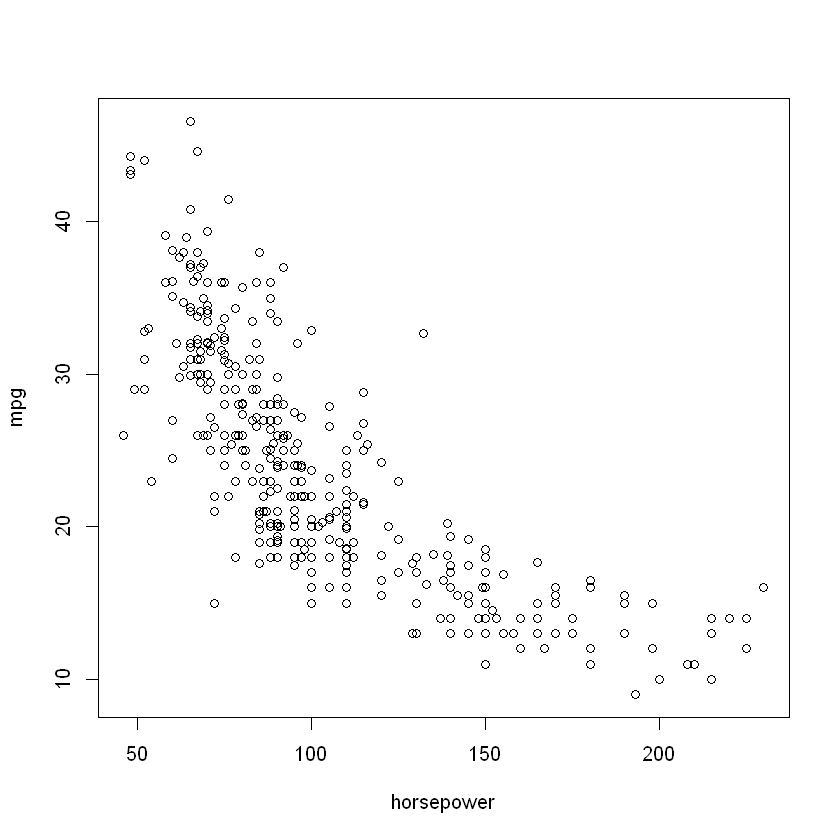

In [6]:
# scatter plot
plot(mpg ~ horsepower, data = Auto)
# simple linear regression
lm_hp_lin <- lm(mpg ~ horsepower, data=Auto)
lm_hp_quadr <- lm(mpg ~ horsepower + I(horsepowerˆ2), data=Auto)
# model summary
summary(lm_hp_quadr)
# Visualisation: for a simple linear model you can use abline
abline(lm_hp_lin, col = "red")
# for the quadratic model we build our own predictor function
f_q <- function(x){
coefs <- coef(lm_hp_quadr)
coefs[1] + coefs[2] * x + coefs[3] * x^2
}
curve(f_q, 40, 230, add = TRUE, col = "blue")

3.1.3 Lab: Cross-validation

Now work through Lab 5.3.1 to 5.3.3 in James et al.

3.2 Model selection using cross-validation

In [7]:
library(boot)
?cv.glm

cv.glm                  package:boot                   R Documentation

_C_r_o_s_s-_v_a_l_i_d_a_t_i_o_n _f_o_r _G_e_n_e_r_a_l_i_z_e_d _L_i_n_e_a_r _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function calculates the estimated K-fold cross-validation
     prediction error for generalized linear models.

_U_s_a_g_e:

     cv.glm(data, glmfit, cost, K)
     
_A_r_g_u_m_e_n_t_s:

    data: A matrix or data frame containing the data.  The rows should
          be cases and the columns correspond to variables, one of
          which is the response.

  glmfit: An object of class '"glm"' containing the results of a
          generalized linear model fitted to 'data'.

    cost: A function of two vector arguments specifying the cost
          function for the cross-validation.  The first argument to
          'cost' should correspond to the observed responses and the
          second argument should correspond to the predict

In [9]:
library(boot)
glm_01 <- glm(mpg ~ horsepower + I(horsepower^2), data = Auto)
cv_error <- cv.glm(Auto, glmfit = glm_01)
cv_error$delta

[1] 19.24821 19.24787

In [10]:
cv_error <- rep (0, 6) # Why 6 as 2nd argument?
cv_error[1] <- cv.glm(Auto, glm_01)$delta[1]
glm_fit_02 <- glm(mpg ~ horsepower + I(horsepowerˆ2) + year, data = Auto)
cv_error[2] <- cv.glm(Auto, glm_fit_02)$delta[1]


ERROR: Error in eval(predvars, data, env): object 'horsepowerˆ2' not found


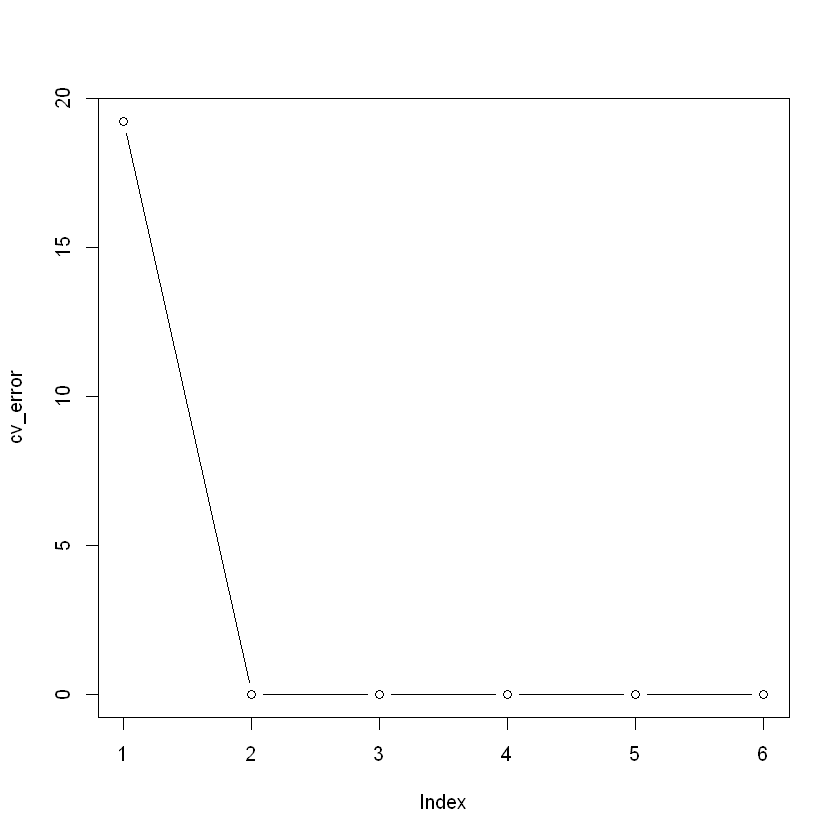

In [11]:
plot(cv_error, type="b")


In [13]:
library(ISLR2)
library(boot)
data("Auto")
mod_glm_loop <- mod_glm_01 <- "mpg ~ horsepower + I(horsepower^2)"
new_vars_loop <- new_vars <- c("cylinders", "displacement", "weight",
"acceleration", "year")
glm_01 <- glm(as.formula(mod_glm_01), data = Auto)
# Initialisation of loop variables
mse_loocv_best <- loocv_mse <- cv.glm(Auto, glmfit = glm_01)$delta[1]
best_vars <- NULL
repeat({
best_var <- NULL
for(new_var in new_vars_loop){
model_loop <- as.formula(paste(mod_glm_loop, "+", new_var))
glm_fit_loop <- glm(model_loop, data = Auto)
mse_loocv_loop <- cv.glm(Auto, glmfit = glm_fit_loop)$delta[1]
# improvement?
if(mse_loocv_loop < mse_loocv_best){
mse_loocv_best <- mse_loocv_loop
best_var <- new_var
}
}
# If no improvement, stop calculation
if(is.null(best_var)) break
# update model
mod_glm_loop <- paste(mod_glm_loop, "+", best_var)
# remove best_var from variable set
new_vars_loop <- setdiff(new_vars_loop, best_var)
# store current best loocv_mse
loocv_mse <- c(loocv_mse, mse_loocv_best)
# store current best new variable
best_vars <- c(best_vars, best_var)
})



Call:
glm(formula = as.formula(mod_glm_best), data = Auto)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.5836719  3.9432463  -0.909    0.364    
horsepower      -0.2465520  0.0274476  -8.983   <2e-16 ***
I(horsepower^2)  0.0008632  0.0000932   9.261   <2e-16 ***
year             0.7543108  0.0472204  15.974   <2e-16 ***
weight          -0.0051121  0.0003975 -12.860   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 9.657165)

    Null deviance: 23819.0  on 391  degrees of freedom
Residual deviance:  3737.3  on 387  degrees of freedom
AIC: 2008.4

Number of Fisher Scoring iterations: 2


[1] 9.842709

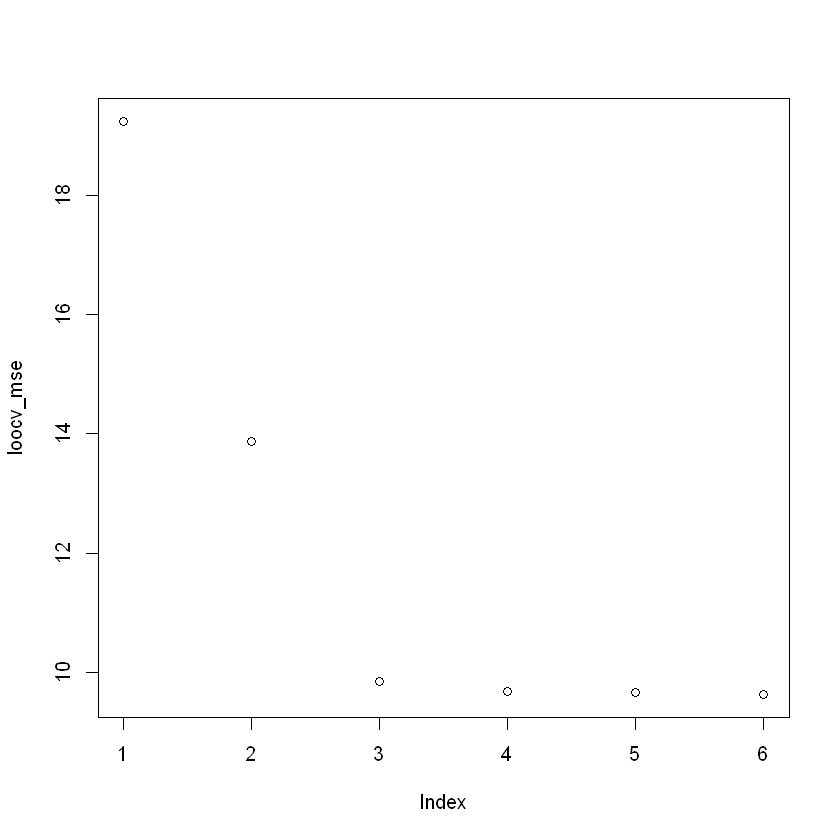

In [14]:
# How large is the improvement?
plot(loocv_mse)
# only the first two additional variables decrease the MSE to a large extent
# Best Modell:
mod_glm_best <- paste(mod_glm_01, " + ", paste(best_vars[1:2], collapse = "+"))
glm_best <- glm(as.formula(mod_glm_best), data = Auto)
summary(glm_best)
cv.glm(Auto, glm_best)$delta[1]

In [15]:
mod_glm_full <- paste(mod_glm_01, " + ", paste(best_vars, collapse = "+"))
glm_best_AIC <- glm(as.formula(mod_glm_full), data = Auto) |>
step(trace = 0)
glm_best_BIC <- glm(as.formula(mod_glm_full), data = Auto) |>
step(trace = 0, k = log(nrow(Auto)))
summary(glm_best_AIC)
summary(glm_best_BIC)


Call:
glm(formula = mpg ~ horsepower + I(horsepower^2) + year + weight + 
    acceleration + displacement + cylinders, data = Auto)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.5149207  4.6423257   0.973 0.331386    
horsepower      -0.3298693  0.0349025  -9.451  < 2e-16 ***
I(horsepower^2)  0.0010786  0.0001069  10.089  < 2e-16 ***
year             0.7360187  0.0468742  15.702  < 2e-16 ***
weight          -0.0032613  0.0006917  -4.715 3.39e-06 ***
acceleration    -0.3570393  0.1008620  -3.540 0.000449 ***
displacement    -0.0179828  0.0070266  -2.559 0.010872 *  
cylinders        0.5226163  0.3074883   1.700 0.090010 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 9.352475)

    Null deviance: 23819.0  on 391  degrees of freedom
Residual deviance:  3591.4  on 384  degrees of freedom
AIC: 1998.7

Number of Fisher Scoring iterations: 2



Call:
glm(formula = mpg ~ horsepower + I(horsepower^2) + year + weight + 
    acceleration, data = Auto)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.8356440  4.6256750   0.829  0.40750    
horsepower      -0.3068479  0.0338391  -9.068  < 2e-16 ***
I(horsepower^2)  0.0009800  0.0001002   9.781  < 2e-16 ***
year             0.7463609  0.0468191  15.941  < 2e-16 ***
weight          -0.0042549  0.0004869  -8.738  < 2e-16 ***
acceleration    -0.2905909  0.0972104  -2.989  0.00298 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 9.463112)

    Null deviance: 23819.0  on 391  degrees of freedom
Residual deviance:  3652.8  on 386  degrees of freedom
AIC: 2001.4

Number of Fisher Scoring iterations: 2


4 Programming Cross-Validation

In [16]:
set.seed(1234567890)
x <- matrix(1:30, ncol = 1)
y_true <- cut(x, breaks = c(0, 10, 20, 30), labels = c(10, 15, 8)) |>
as.character() |> as.integer()
epsilon_train <- rnorm(length(x))
y_obs <- y_true + epsilon_train

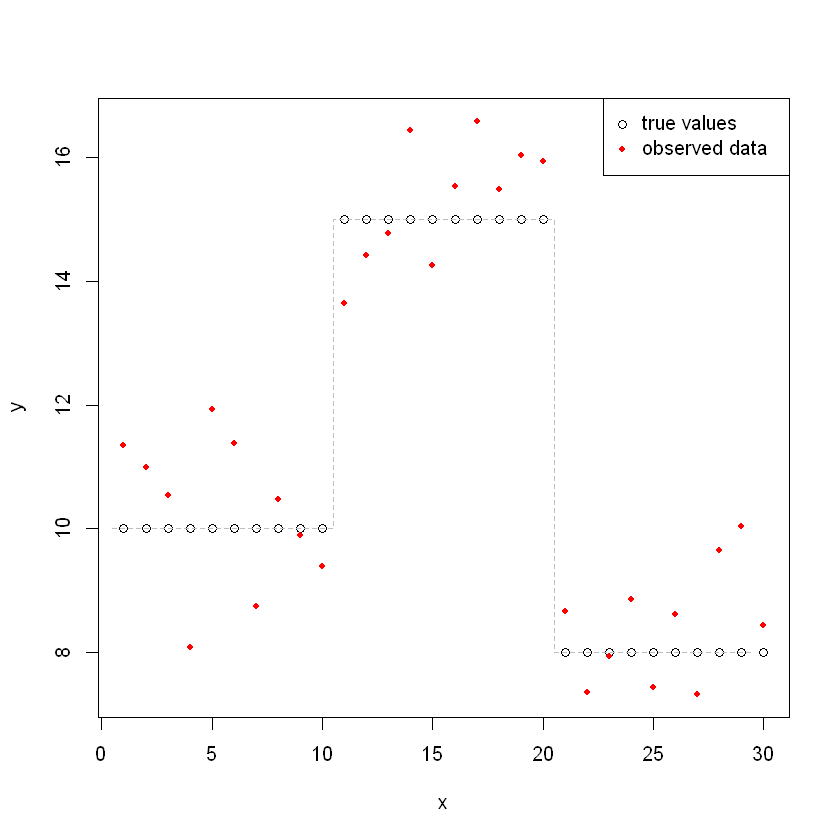

In [17]:
plot(x[,1], y_true, type = "p", ylim = range(c(y_obs, y_true)),
xlab = "x", ylab = "y")
lines(x[,1]-0.5, y_true, type = "s", lty = 2, col = "grey")
points(x[,1], y_obs, lty = 2, col = "red", pch = 20)
legend("topright", legend = c("true values", "observed data"),
col = c("black", "red"), pch = c(1, 20))

In [24]:
# create new data by leaving one observation out
x_loo <- x[-1]
y_loo <- y_obs[-1]
# fit the linear regression model with the loo data
lm_loo <- lm(y_loo ~ x_loo)
# plot the resulting regression to existing plot
abline(lm_loo, col = "grey")
# find the sum of squared error using the missing point
(predict(lm_loo, newdata = data.frame(x_loo = x[1])) - y_obs[1])^2

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [21]:
# initialization of result vector
loo_sse <- NULL
# loop over each of the n observations
for(i in seq_along(x)){
#create new data by leaving one observation out
x_loo <- x[-i]
y_loo <- y_obs[-i]
## fit the linear regression model with the loo data
lm_loo <- lm(y_loo ~ x_loo)
# plot the resulting regression to existing plot
abline(lm_loo, col="grey")
# store current sse to result vector using the missing point
loo_sse <- c(loo_sse,
(predict(lm_loo, newdata = data.frame(x_loo = x[i])) - y_obs[i])^2
)
}
# calculate mean of calculated sse
mse_loocv <- mean(loo_sse)
mse_loocv

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [22]:
# Initialisation of result vector
mse_loocv <- rep(NA, 10)
# outer loop changing the polynomial degree
for(k in 1:10){
loo_sse <- NULL
# inner loop over each of the n observations
for(i in seq_along(x)){
#create new data by leaving one observation out
x_loo <- x[-i]
y_loo <- y_obs[-i]
## fit the linear regression model with the loo data
lm_loo <- lm(y_loo ~ poly(x_loo, degree = k, raw = T))
# store current sse to result vector using the missing point
loo_sse <- c(loo_sse,
(predict(lm_loo, newdata = data.frame(x_loo = x[i])) - y_obs[i])ˆ2
)
}
# store mse fur current polynomial degree in mse_loo
mse_loocv[k] <- mean(loo_sse)
}
plot(mse_loocv, type="b")

ERROR: Error in parse(text = x, srcfile = src): <text>:15:65: unexpected symbol
14: loo_sse <- c(loo_sse,
15: (predict(lm_loo, newdata = data.frame(x_loo = x[i])) - y_obs[i])ˆ2
                                                                    ^


In [23]:
lm_best_mse <- lm(y_obs ~ poly(x, degree = which.min(mse_loocv)))
plot(x, lm_best_mse$fitted.values, col="red", type = "l")
points(x, y_obs)
lines(x, y_true)

ERROR: Error in eval(predvars, data, env): object 'mse_loocv' not found
